In [6]:
# Linear regression

# we start by loading the boston houses dataset

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X, y = datasets.load_boston(return_X_y=True)

# we only want to use the number of rooms feature
# I know that it is the 6th column
X = X[:,5]

print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)


The shape of X is:  (506,)
The shape of y is:  (506,)


In [10]:
# now we split the data

# because we want to use cross validation, 
# we randomly select 10% as test, 10% as validation, and 80% as training
Ntotal = X.shape[0]
Ntest_val = int(Ntotal/5)
Ntrain = Ntotal - Ntest_val

# now let's generate the indices for the test and val
test_val_idx = np.random.choice(range(Ntotal),Ntest_val,replace=False)
test_idx = test_val_idx[:int(Ntest_val/2)]
val_idx = test_val_idx[int(Ntest_val/2):]

X_ts = X[test_idx]
y_ts = y[test_idx]
X_vl = X[val_idx]
y_vl = y[val_idx]
X_tr = np.delete(X, test_val_idx)
y_tr = np.delete(y, test_val_idx)

print('The shape of X_ts is: ', X_ts.shape)
print('The shape of y_ts is: ', y_ts.shape)
print('The shape of X_vl is: ', X_vl.shape)
print('The shape of y_vl is: ', y_vl.shape)
print('The shape of X_tr is: ', X_tr.shape)
print('The shape of y_tr is: ', y_tr.shape)

# we forget about the testing data for now

The shape of X_ts is:  (50,)
The shape of y_ts is:  (50,)
The shape of X_vl is:  (51,)
The shape of y_vl is:  (51,)
The shape of X_tr is:  (405,)
The shape of y_tr is:  (405,)


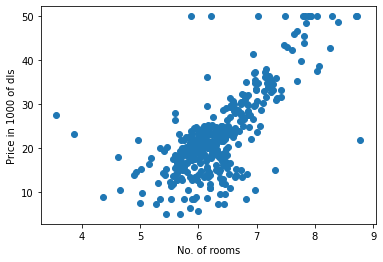

In [12]:
#let's visualize the training data
plt.scatter(X_tr,y_tr)
plt.xlabel('No. of rooms')
plt.ylabel('Price in 1000 of dls')
plt.show()

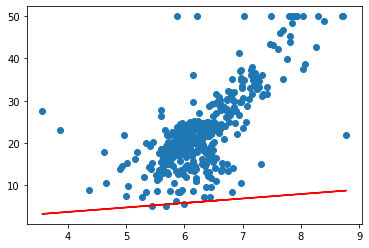

In [27]:
# we want to find the best values for bias and slope
# since we do not know them, let's initialize them to be
# random numbers from a normal distribution with zero mean
# and variance of 1

bias = np.random.randn(1)
slope = np.random.randn(1)

# now we can get y_hat
y_hat = bias + slope*X_tr

# let's visualize it
plt.scatter(X_tr,y_tr)
plt.plot(X_tr, y_hat, c='r')
plt.show()

In [28]:
# now that we have a "linear model" we can calculate the error, or cost function
J = (1/Ntrain)*(1/2)*np.sum(np.power(y_hat - y_tr, 2))

print('The initial MSE is: ', J)

The initial MSE is:  174.1736227288871


In [29]:
# how can we reduce the cost? We need to do a gradient descent update of
# bias and slope

dJdbias = (1/Ntrain)*np.sum(y_hat-y_tr)
dJdslope = (1/Ntrain)*np.sum([iy*ix for iy, ix in zip(y_hat-y_tr,X_tr)])

In [30]:
# now we can update the bias and slope values
learning_rate = 0.01

bias = bias - learning_rate*dJdbias
slope = slope - learning_rate*dJdslope

In [32]:
# calculate the line with the new slope and bias values
y_hat = bias + slope*X_tr

J = (1/Ntrain)*(1/2)*np.sum(np.power(y_hat - y_tr, 2))
print('The training MSE is: ', J)

The training MSE is:  79.19065018539959


In [33]:
# You need to calculate the error also with the validation set
Nval = X_vl.shape[0]
y_hat_vl = bias + slope*X_vl
J_vl = (1/Nval)*(1/2)*np.sum(np.power(y_hat_vl - y_vl, 2))

print('The validation MSE is: ', J_vl)

The validation MSE is:  75.70765643477401


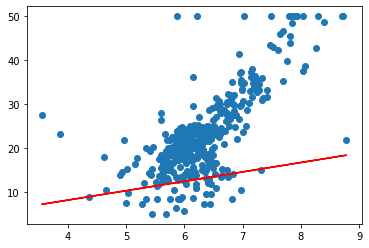

In [34]:
plt.scatter(X_tr,y_tr)
plt.plot(X_tr,y_hat, c='r')
plt.show()

In [44]:
# now we put everything in a for loop, so that we can repeat the process
Niters = 20000

# generating bias and slope
bias = np.random.randn(1)
slope = np.random.randn(1)
learning_rate = 0.025

for iter in range(Niters):
  dJdbias = (1/Ntrain)*np.sum(y_hat-y_tr)
  dJdslope = (1/Ntrain)*np.sum([iy*ix for iy, ix in zip(y_hat-y_tr,X_tr)])
  bias = bias - learning_rate*dJdbias
  slope = slope - learning_rate*dJdslope

  # calculate the line with the new slope and bias values
  y_hat = bias + slope*X_tr
  # for the training set
  J = (1/Ntrain)*(1/2)*np.sum(np.power(y_hat - y_tr,2))
  
  # and for the validation set
  y_hat_vl = bias + slope*X_vl
  J_vl = (1/Nval)*(1/2)*np.sum(np.power(y_hat_vl - y_vl,2))

  print('At iteration No. ' + str(iter) + ' ,the MSE (training) cost is: ', J)
  print('------------------------------ the MSE (validation) cost is: ', J_vl)

Streaming output truncated to the last 5000 lines.
------------------------------ the MSE (validation) cost is:  20.83495850409779
At iteration No. 17501 ,the MSE (training) cost is:  20.8082973833965
------------------------------ the MSE (validation) cost is:  20.834969371202135
At iteration No. 17502 ,the MSE (training) cost is:  20.808297071057698
------------------------------ the MSE (validation) cost is:  20.834980235419383
At iteration No. 17503 ,the MSE (training) cost is:  20.80829675889182
------------------------------ the MSE (validation) cost is:  20.834991096750255
At iteration No. 17504 ,the MSE (training) cost is:  20.808296446898765
------------------------------ the MSE (validation) cost is:  20.835001955195484
At iteration No. 17505 ,the MSE (training) cost is:  20.80829613507844
------------------------------ the MSE (validation) cost is:  20.835012810755796
At iteration No. 17506 ,the MSE (training) cost is:  20.808295823430743
------------------------------ the M

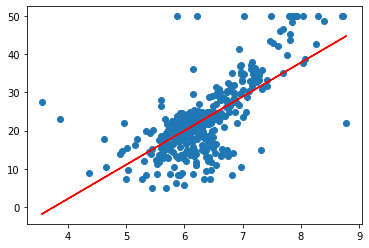

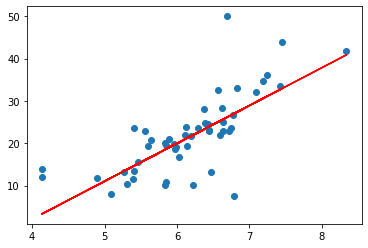

In [43]:
# let's visualize the line that we get with this bias and slope and the data

# this plot is for the training data and the line 
plt.scatter(X_tr, y_tr)
plt.plot(X_tr, y_hat, c='r')
plt.show()

# this plot is for the validation data and the line 
y_hat_vl = bias + slope*X_vl
plt.scatter(X_vl, y_vl)
plt.plot(X_vl, y_hat_vl, c='r')
plt.show()